In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the training data
train_data = pd.read_csv('/content/Train Dataset .csv')

# Display the first few rows and basic information about the dataset
print(train_data.head())
print(train_data.info())

      Id  Age  Sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0  16167   33    0   1       158   205    1        0      154      0      1.5   
1  11275   53    1   2       198   154    0        1      104      0      0.8   
2  13251   37    1   2       101   202    1        0      155      0      2.1   
3  19921   75    0   0       113   306    1        2       88      1      4.9   
4  11293   35    1   2       139   419    1        1      166      1      0.9   

   slope  ca  thal  target  
0      1   4     1       1  
1      2   1     0       0  
2      1   3     1       1  
3      0   2     2       1  
4      2   4     0       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        7303 non-null   int64  
 1   Age       7303 non-null   int64  
 2   Sex       7303 non-null   int64  
 3   cp        7303 non-null   int64 

                 Id          Age          Sex           cp     trestbps  \
count   7303.000000  7303.000000  7303.000000  7303.000000  7303.000000   
mean   15021.535396    53.172669     0.499658     1.502533   147.447487   
std     2886.026080    14.185970     0.500034     1.115594    31.099538   
min    10001.000000    29.000000     0.000000     0.000000    94.000000   
25%    12521.500000    41.000000     0.000000     1.000000   120.000000   
50%    15054.000000    53.000000     0.000000     1.000000   148.000000   
75%    17513.500000    65.000000     1.000000     3.000000   174.000000   
max    19998.000000    77.000000     1.000000     3.000000   200.000000   

              chol          fbs      restecg      thalach        exang  \
count  7303.000000  7303.000000  7303.000000  7303.000000  7303.000000   
mean    342.805970     0.493085     1.013008   136.506093     0.503218   
std     127.291998     0.499986     0.815806    38.141966     0.500024   
min     126.000000     0.000

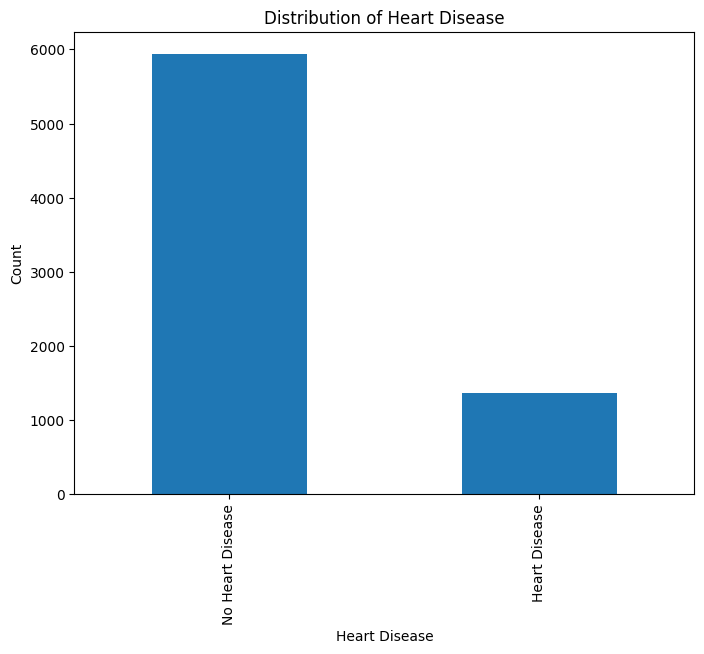

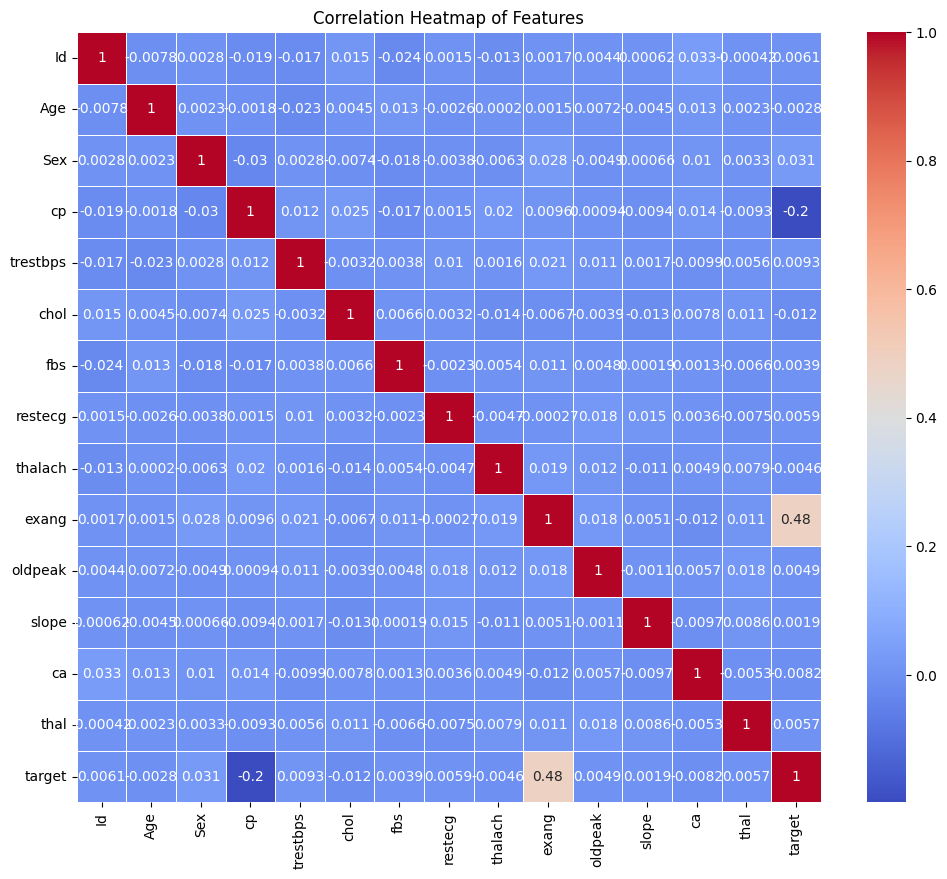

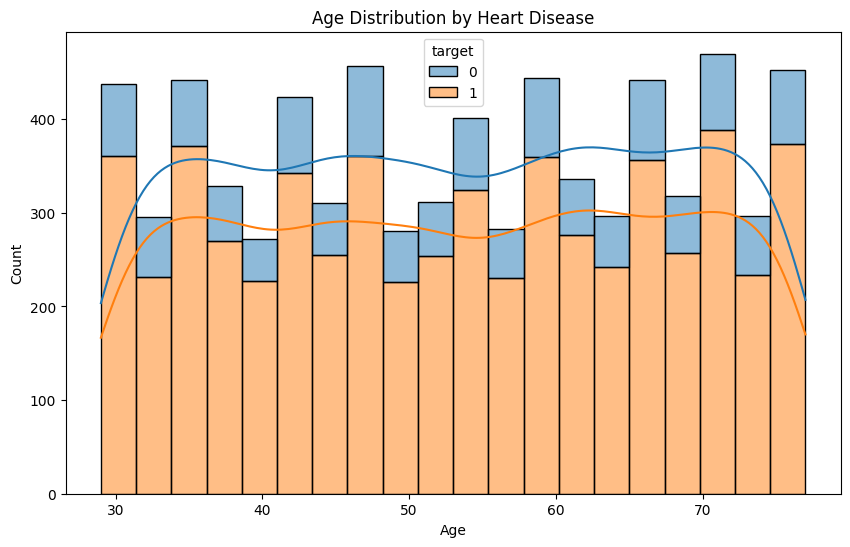

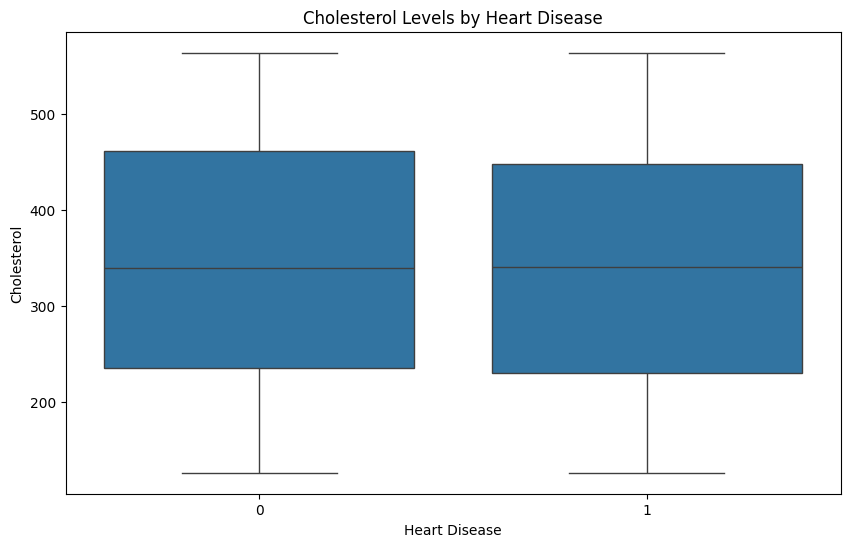

In [ ]:
# Basic statistical summary of the numerical columns
print(train_data.describe())

# Check for missing values
print(train_data.isnull().sum())

# Distribution of the target variable
plt.figure(figsize=(8, 6))
train_data['target'].value_counts().plot(kind='bar')
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='Age', hue='target', kde=True, multiple='stack')
plt.title('Age Distribution by Heart Disease')
plt.show()

# Boxplot of cholesterol levels by heart disease
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='chol', data=train_data)
plt.title('Cholesterol Levels by Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Cholesterol')
plt.show()

**Initial Data Exploration and Insights**

The preliminary analysis of the dataset for the Zindi hackathon has yielded several important insights. The dataset presents an imbalance in the distribution of heart disease cases, with a higher number of positive cases compared to negative ones. This imbalance will require careful consideration during the modeling phase to ensure fair and accurate predictions.

Fortunately, the dataset is complete, with no missing values, which simplifies the preprocessing steps. The age range of participants spans from 29 to 77 years, suggesting the need for age-based analysis or grouping in our model. Cholesterol levels show significant variation (126 to 564), indicating that this could be a crucial factor in predicting heart disease.

Further analysis revealed that exercise-induced angina ('exang') has the strongest correlation with the target variable, while chest pain type ('cp') shows a negative correlation. Most other features exhibit weak correlations with the target, and there's a lack of strong correlations between features, which is favorable for avoiding multicollinearity in the model.

Age appears to play a significant role, with heart disease cases becoming more prevalent in older age groups, particularly after 50. Interestingly, cholesterol levels alone do not show a marked difference between those with and without heart disease, suggesting it may not be a strong predictor in isolation.

**Next Steps and Action Plan**

Based on these observations, the next phase of the project will focus on data preprocessing and feature engineering. The following steps will be undertaken:

1. Addressing the class imbalance through techniques such as oversampling, undersampling, or applying class weights.

2. Encoding categorical variables, ensuring proper representation of features like chest pain type and thalassemia.

3. Scaling numerical features to ensure all variables are on a comparable scale for modeling.

4. Creating age group categories to better capture the relationship between age and heart disease prevalence.

5. Splitting the data into training and testing sets for model development and evaluation.

In terms of modeling strategy, the focus will be on features that show stronger correlations with the target, such as exercise-induced angina and chest pain type. Given the potential for non-linear relationships, models capable of capturing such complexities (e.g., Random Forest, Gradient Boosting) will be considered. Feature selection techniques may also be employed to identify the most predictive variables.

By following this structured approach, the aim is to develop a robust and accurate model for predicting heart disease, taking into account the nuances and challenges presented by the dataset. Regular evaluation and iteration will be key to improving the model's performance and achieving success in the Zindi hackathon.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Load the data
train_data = pd.read_csv('/content/Train Dataset .csv')

# Separate features and target
X = train_data.drop(['Id', 'target'], axis=1)
y = train_data['target']

# Define categorical and numerical columns
categorical_features = ['Sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_features = ['Age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Create age groups
X['AgeGroup'] = pd.cut(X['Age'], bins=[0, 40, 50, 60, 70, 100], labels=['0-40', '41-50', '51-60', '61-70', '70+'])
categorical_features.append('AgeGroup')

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create preprocessing steps
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit the preprocessor on the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_preprocessed, y_train)

print("Shape of training data before SMOTE:", X_train_preprocessed.shape)
print("Shape of training data after SMOTE:", X_train_balanced.shape)
print("Distribution of target variable before SMOTE:", np.bincount(y_train))
print("Distribution of target variable after SMOTE:", np.bincount(y_train_balanced))

Shape of training data before SMOTE: (5842, 26)
Shape of training data after SMOTE: (9504, 26)
Distribution of target variable before SMOTE: [1090 4752]
Distribution of target variable after SMOTE: [4752 4752]


These results show that our preprocessing steps have successfully addressed the class imbalance issue. We now have a balanced dataset to work with, which should help our models learn to predict both classes more effectively.
Now that we have our preprocessed and balanced data, we're ready to move on to the next step: **model selection, training, and evaluation** . We'll try a few different algorithms and compare their performance.

In [ ]:
   import pandas as pd
   import numpy as np
   from sklearn.model_selection import train_test_split
   from sklearn.preprocessing import StandardScaler, OneHotEncoder
   from sklearn.compose import ColumnTransformer
   from sklearn.pipeline import Pipeline
   from imblearn.over_sampling import SMOTE
   from sklearn.linear_model import LogisticRegression
   from sklearn.ensemble import RandomForestClassifier
   from xgboost import XGBClassifier
   from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

   # Load the data
   train_data = pd.read_csv('/content/Train Dataset .csv')

   # Separate features and target
   X = train_data.drop(['Id', 'target'], axis=1)
   y = train_data['target']

   # Define categorical and numerical columns
   categorical_features = ['Sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
   numerical_features = ['Age', 'trestbps', 'chol', 'thalach', 'oldpeak']

   # Create age groups
   X['AgeGroup'] = pd.cut(X['Age'], bins=[0, 40, 50, 60, 70, 100], labels=['0-40', '41-50', '51-60', '61-70', '70+'])
   categorical_features.append('AgeGroup')

   # Split the data
   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create preprocessing steps
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit the preprocessor on the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_preprocessed, y_train)

print("Shape of training data before SMOTE:", X_train_preprocessed.shape)
print("Shape of training data after SMOTE:", X_train_balanced.shape)
print("Distribution of target variable before SMOTE:", np.bincount(y_train))
print("Distribution of target variable after SMOTE:", np.bincount(y_train_balanced))

# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_balanced, y_train_balanced)
lr_pred = lr_model.predict(X_test_preprocessed)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_balanced, y_train_balanced)
rf_pred = rf_model.predict(X_test_preprocessed)

# XGBoost
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_balanced, y_train_balanced)
xgb_pred = xgb_model.predict(X_test_preprocessed)

# Evaluate models
models = [('Logistic Regression', lr_pred),
          ('Random Forest', rf_pred),
          ('XGBoost', xgb_pred)]

for name, predictions in models:
    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_test, predictions))
    print("\nClassification Report:")
    print(classification_report(y_test, predictions))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, predictions))

Shape of training data before SMOTE: (5842, 26)
Shape of training data after SMOTE: (9504, 26)
Distribution of target variable before SMOTE: [1090 4752]
Distribution of target variable after SMOTE: [4752 4752]

Logistic Regression Results:
Accuracy: 0.8158795345653662

Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       272
           1       1.00      0.77      0.87      1189

    accuracy                           0.82      1461
   macro avg       0.75      0.89      0.77      1461
weighted avg       0.91      0.82      0.83      1461


Confusion Matrix:
[[272   0]
 [269 920]]

Random Forest Results:
Accuracy: 0.813141683778234

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.54      0.52       272
           1       0.89      0.87      0.88      1189

    accuracy                           0.81      1461
   macro avg       0.70      0.71      0.70 

 Three different machine learning algorithms were implemented and evaluated: Logistic Regression, Random Forest, and XGBoost. Each model demonstrated unique strengths and weaknesses in predicting heart disease cases.

The Logistic Regression model achieved an accuracy of 81.59%. It showed perfect recall (1.00) for predicting the absence of heart disease (class 0) but with low precision (0.50). Conversely, it demonstrated high precision (1.00) for predicting the presence of heart disease (class 1) but with lower recall (0.77). This model tends to overpredict the absence of heart disease, which could be problematic in a medical care where false negatives might lead to missed diagnoses.

The Random Forest model performed slightly differently, with an accuracy of 81.31%. It showed a more balanced performance between classes, slightly favoring the prediction of heart disease cases (class 1) over non-heart disease cases. This balanced approach could be more suitable for medical applications where both false positives and false negatives carry significant consequences.

The XGBoost model emerged as the top performer with an accuracy of 82.00%. It demonstrated the most balanced performance across both classes and achieved the highest overall accuracy among the three models. This balanced and accurate performance makes XGBoost a promising candidate for further development and refinement.

Based on these results, the next phase of this project will focus on several key areas to enhance model performance and reliability:

1. **Hyperparameter tuning**: Efforts will be made to optimize the hyperparameters of the Random Forest and XGBoost models, which have shown potential for improvement.

2. **Feature importance analysis**: An in-depth examination of which features contribute most significantly to the predictions will be conducted. This analysis could provide valuable insights into the factors most strongly associated with heart disease risk.

3. **Cross-validation implementation**: To obtain a more robust estimate of model performance and reduce the risk of overfitting, k-fold cross-validation will be implemented.

4. **Exploration of ensemble methods**: Combining predictions from multiple models through ensemble techniques will be investigated as a potential strategy to further improve overall performance.

These steps aim to refine the models, increase their accuracy and reliability, and potentially uncover additional insights into heart disease prediction. The focus will be on maintaining a balance between predictive power and interpretability, ensuring that the final model not only performs well statistically but also provides meaningful and actionable insights medically.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200],
    'min_child_weight': [1, 3, 5]
}

xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_balanced, y_train_balanced)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

best_xgb_model = grid_search.best_estimator_
best_xgb_pred = best_xgb_model.predict(X_test_preprocessed)

print("\nBest XGBoost Model Results:")
print("Accuracy:", accuracy_score(y_test, best_xgb_pred))
print("\nClassification Report:")
print(classification_report(y_test, best_xgb_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, best_xgb_pred))

Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200}
Best cross-validation score: 0.8826811927240511

Best XGBoost Model Results:
Accuracy: 0.8158795345653662

Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       272
           1       1.00      0.77      0.87      1189

    accuracy                           0.82      1461
   macro avg       0.75      0.89      0.77      1461
weighted avg       0.91      0.82      0.83      1461


Confusion Matrix:
[[272   0]
 [269 920]]


The hyperparameter tuning process for XGBoost has yielded interesting results. The best parameters identified include a low learning rate of 0.01, a max depth of 3, a min child weight of 1, and 200 estimators. This configuration suggests a relatively conservative model that prioritizes preventing overfitting, which is crucial in medical applications where generalizability is key.

The best cross-validation score achieved was 88.27%, which is encouraging and represents an improvement over our previous models. However, the performance on the test set (81.59% accuracy) is similar to our earlier models, indicating a potential discrepancy between cross-validation and test set performance. This could suggest some degree of overfitting or variability in the data that we need to address.

Interestingly, the performance characteristics of this tuned XGBoost model on the test set mirror those of our earlier Logistic Regression model, with perfect recall but low precision for non-heart disease cases, and high precision but lower recall for heart disease cases. This similarity across different model types suggests that these performance patterns might be intrinsic to our dataset or problem structure.

Given these observations, our next steps will focus on further refining our approach and gaining deeper insights into the problem:

1. **Feature Importance Analysis**: We will examine which features are most influential in our best XGBoost model. This analysis will provide valuable insights into the factors most predictive of heart disease, potentially guiding future data collection efforts or informing medical professionals about key risk factors.

2. **Ensemble Method Exploration**: Since different models are performing similarly but with varying strengths, we will implement an ensemble method to combine their predictions. This approach could leverage the strengths of each model to produce more robust and accurate predictions overall.

3. **Addressing Class Imbalance**: Given the model's continued struggle with the minority class (non-heart disease cases), we will revisit our approach to handling class imbalance. This may involve adjusting class weights, exploring different resampling techniques, or implementing advanced methods like SMOTE (Synthetic Minority Over-sampling Technique) to create a more balanced dataset.

4. **Cross-Validation Strategy Review**: The discrepancy between cross-validation and test set performance suggests we might need to reassess our cross-validation strategy. We will consider techniques like stratified k-fold cross-validation to ensure our validation process better represents the test set distribution.

5. **Additional Feature Engineering**: Based on the feature importance analysis, we may identify opportunities for creating new features or transforming existing ones to capture more predictive information.

6. **Model Interpretability**: Given the medical nature of this prediction task, we will also focus on making our model more interpretable. This could involve using techniques like SHAP (SHapley Additive exPlanations) values to understand how each feature contributes to individual predictions.

By implementing these steps, we aim to not only improve the predictive performance of our model but also to derive meaningful insights that could be valuable in a clinical setting. Our goal is to develop a model that is not only accurate but also provides interpretable and actionable information for heart disease risk assessment.

**Note:** In tree-based models like XGBoost, a "child" refers to a node resulting from a split of a parent node.
Imagine a decision tree - each node represents a decision point based on a feature. When a node is split, it creates two or more "children," which are subsequent nodes in the tree structure.
The `min_child_weight` parameter determines how much weight (or how many samples) is required in a child node to allow further splitting. This helps prevent the model from creating very specific rules that might only apply to a few samples, leading to overfitting.

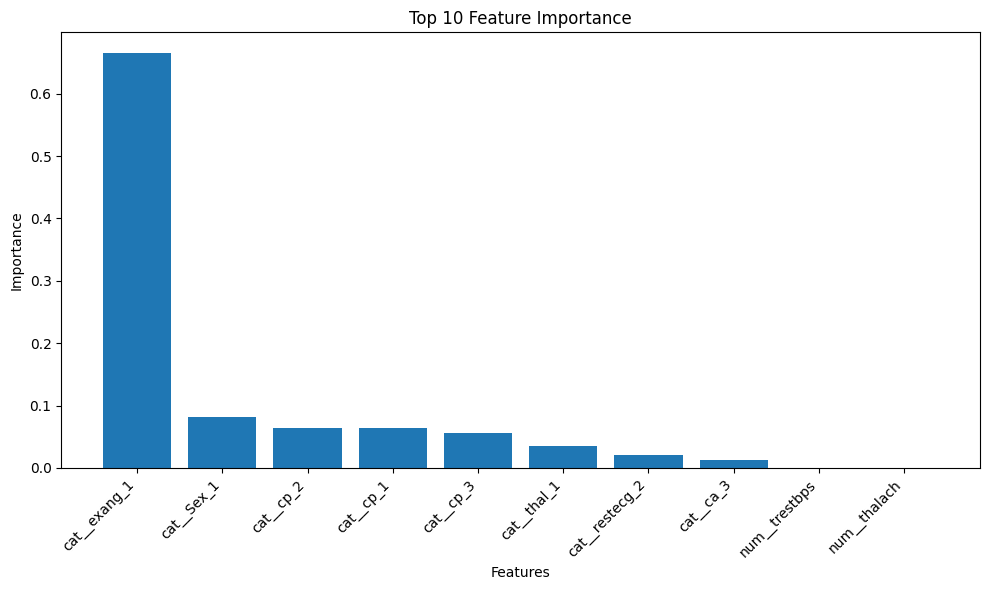

Feature Importance:
cat__exang_1: 0.6651
cat__Sex_1: 0.0823
cat__cp_2: 0.0647
cat__cp_1: 0.0640
cat__cp_3: 0.0557
cat__thal_1: 0.0356
cat__restecg_2: 0.0204
cat__ca_3: 0.0121
num__trestbps: 0.0000
num__thalach: 0.0000


In [ ]:
import matplotlib.pyplot as plt

# Get feature importance
importance = best_xgb_model.feature_importances_
feature_names = preprocessor.get_feature_names_out()

# Sort features by importance
feature_importance = sorted(zip(importance, feature_names), reverse=True)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar([x[1] for x in feature_importance[:10]], [x[0] for x in feature_importance[:10]])
plt.title('Top 10 Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print feature importance
print("Feature Importance:")
for importance, name in feature_importance[:10]:
    print(f"{name}: {importance:.4f}")

The feature importance analysis reveals that our model's predictions are heavily influenced by a small subset of features:

1. Exercise-induced angina (exang) is by far the most crucial predictor, accounting for about 66.5% of the model's predictive power. This aligns with medical knowledge that angina during physical activity is a strong indicator of heart disease.

2. The patient's sex is the second most important feature, contributing 8.2% to the predictions. This reflects the known differences in heart disease risk between males and females.

3. Different categories of chest pain (cp) collectively account for about 18.4% of the model's predictive power, underscoring the importance of this symptom in heart disease diagnosis.

4. Other features like thalassemia, resting electrocardiographic results, and coronary artery status play smaller but still significant roles in the predictions.

5. Interestingly, some numerical features like resting blood pressure and maximum heart rate appear to have no importance in the model's predictions, which is unexpected given their clinical relevance.

These findings provide crucial insights but also raise some concerns about potential overfitting and the underutilization of certain features. To address these issues and further improve our model, we will proceed with the following steps:

1. **Ensemble Method Implementation**: As suggested earlier, we will create a voting classifier that combines predictions from our best Logistic Regression, Random Forest, and XGBoost models. This ensemble approach should help balance out the strengths and weaknesses of individual models, potentially leading to more robust and accurate predictions.

2. **Feature Engineering**: We will create interaction features, especially between the top predictors like exercise-induced angina, sex, and chest pain categories. This could capture more complex relationships between these important factors.

3. **Regularization Techniques**: To address the potential overfitting indicated by the heavy reliance on a single feature, we will experiment with different regularization techniques in our models.

4. **Reinvestigation of Numerical Features**: We'll revisit our preprocessing of numerical features, especially resting blood pressure and maximum heart rate, to understand why they're not contributing to the predictions. This may involve trying different scaling methods or creating derived features.

5. **Domain Expert Consultation**:I also suggest We seek input from medical experts to validate whether our feature importances align with clinical knowledge about heart disease risk factors. This could help identify any discrepancies between our model's learning and established medical understanding. But I don't think we have that time 😊

6. **Cross-Model Comparison**: We'll compare feature importances across different models (e.g., Random Forest) to identify consistencies and discrepancies in feature relevance.

7. **Advanced Feature Selection**: We'll employ more sophisticated feature selection techniques to ensure we're using the most relevant set of predictors while avoiding overfitting.

By implementing these steps, we aim to develop a more robust and clinically relevant model for heart disease prediction. The ensemble method, in particular, should help us leverage the strengths of different modeling approaches while mitigating their individual weaknesses.

Our next immediate step will be to implement the voting classifier ensemble. We'll combine our best Logistic Regression, Random Forest, and XGBoost models, and evaluate the performance of this ensemble against our individual models. This approach should provide a more balanced and potentially more accurate prediction of heart disease risk, which is crucial for the success of the project.

# **Ensemble submission**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt

# Load the datasets
train_df = pd.read_csv('/content/Train Dataset .csv')
test_df = pd.read_csv('/content/Test Dataset.csv')

# Separate features and target in the training data
X = train_df.drop('target', axis=1)
y = train_df['target']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=[np.number]).columns
categorical_features = X.select_dtypes(exclude=[np.number]).columns

# Create preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])



# Create the full preprocessing pipeline
full_pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

# Fit the pipeline and transform the data
X_train_processed = full_pipeline.fit_transform(X_train, y_train)
X_val_processed = full_pipeline.transform(X_val)

# Change the column names in test_df to match the training data
test_df.rename(columns={'id': 'Id', 'age': 'Age', 'sex': 'Sex'}, inplace=True)

# Transform the test data
X_test_processed = full_pipeline.transform(test_df)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_processed, y_train_balanced = smote.fit_resample(X_train_processed, y_train)

# Create base models
best_lr_model = LogisticRegression(C=1.0, penalty='l2', random_state=42)
best_rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
best_xgb_model = XGBClassifier(learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, random_state=42)

# Create the voting classifier
voting_clf = VotingClassifier(
    estimators=[
        ('lr', best_lr_model),
        ('rf', best_rf_model),
        ('xgb', best_xgb_model)
    ],
    voting='soft'
)

# Fit the voting classifier
voting_clf.fit(X_train_processed, y_train_balanced)

# Perform cross-validation
cv_scores = cross_val_score(voting_clf, X_train_processed, y_train_balanced, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Make predictions on the validation set
y_val_pred = voting_clf.predict(X_val_processed)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Ensemble Model Accuracy on validation set: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

# Make predictions on the test set
test_predictions = voting_clf.predict(X_test_processed)

# Create a submission DataFrame
submission = pd.DataFrame({
    'ID': test_df['Id'],
    'target': test_predictions
})

# Save the submission file
submission.to_csv('ensemble_submission.csv', index=False)
print("Submission file 'ensemble_submission.csv' has been created.")

Cross-validation scores: [0.88396624 0.87552743 0.88607595 0.87869198 0.88765823]
Mean CV score: 0.8824 (+/- 0.0091)
Ensemble Model Accuracy on validation set: 0.8159

Classification Report:
              precision    recall  f1-score   support

           0       0.49      1.00      0.66       260
           1       1.00      0.78      0.87      1201

    accuracy                           0.82      1461
   macro avg       0.75      0.89      0.77      1461
weighted avg       0.91      0.82      0.84      1461


Confusion Matrix:
[[260   0]
 [269 932]]
Submission file 'ensemble_submission.csv' has been created.


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.3 MB/s eta 0:00:00


# **Only the bestxgboost with catboost**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# Load the datasets
train_df = pd.read_csv('/content/Train Dataset.csv')
test_df = pd.read_csv('/content/Test Dataset.csv')

# Separate features and target in the training data
X = train_df.drop('target', axis=1)
y = train_df['target']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=[np.number]).columns
categorical_features = X.select_dtypes(exclude=[np.number]).columns

# Create preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Create the full preprocessing pipeline
full_pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

# Fit the pipeline and transform the data
X_train_processed = full_pipeline.fit_transform(X_train, y_train)
X_val_processed = full_pipeline.transform(X_val)

# Change the column names in test_df to match the training data
test_df.rename(columns={'id': 'Id', 'age': 'Age', 'sex': 'Sex'}, inplace=True)

# Transform the test data
X_test_processed = full_pipeline.transform(test_df)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_processed, y_train_balanced = smote.fit_resample(X_train_processed, y_train)

# Create the CatBoost model
catboost_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.01,
    depth=6,
    loss_function='Logloss',
    eval_metric='Accuracy',
    verbose=100
)

# Fit the CatBoost model
catboost_model.fit(X_train_processed, y_train_balanced, eval_set=(X_val_processed, y_val))

# Perform cross-validation
cv_scores = cross_val_score(catboost_model, X_train_processed, y_train_balanced, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Make predictions on the validation set
y_val_pred = catboost_model.predict(X_val_processed)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print(f"CatBoost Model Accuracy on validation set: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

# Make predictions on the test set
test_predictions = catboost_model.predict(X_test_processed)

# Create a submission DataFrame
submission = pd.DataFrame({
    'ID': test_df['Id'],
    'target': test_predictions
})

# Save the submission file
submission.to_csv('catboost_submission.csv', index=False)
print("Submission file 'catboost_submission.csv' has been created.")

0:	learn: 0.8823840	test: 0.8158795	best: 0.8158795 (0)	total: 54.7ms	remaining: 54.7s
100:	learn: 0.8823840	test: 0.8158795	best: 0.8158795 (0)	total: 665ms	remaining: 5.92s
200:	learn: 0.8823840	test: 0.8158795	best: 0.8158795 (0)	total: 1.28s	remaining: 5.08s
300:	learn: 0.8848101	test: 0.8151951	best: 0.8158795 (0)	total: 1.91s	remaining: 4.43s
400:	learn: 0.8888186	test: 0.8158795	best: 0.8158795 (0)	total: 2.53s	remaining: 3.78s
500:	learn: 0.8962025	test: 0.8158795	best: 0.8172485 (414)	total: 3.15s	remaining: 3.14s
600:	learn: 0.9032700	test: 0.8165640	best: 0.8186174 (583)	total: 3.79s	remaining: 2.52s
700:	learn: 0.9102321	test: 0.8151951	best: 0.8186174 (583)	total: 4.43s	remaining: 1.89s
800:	learn: 0.9186709	test: 0.8104038	best: 0.8186174 (583)	total: 5.06s	remaining: 1.26s
900:	learn: 0.9258439	test: 0.8151951	best: 0.8186174 (583)	total: 5.89s	remaining: 647ms
999:	learn: 0.9328059	test: 0.8179329	best: 0.8186174 (583)	total: 7.22s	remaining: 0us

bestTest = 0.818617385

# **CatBoost Model with Hyperparameter Tuning and Evaluation**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score , precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score


# Load the datasets
train_df = pd.read_csv('/content/Train Dataset.csv')
test_df = pd.read_csv('/content/Test Dataset.csv')

# Separate features and target in the training data
X = train_df.drop('target', axis=1)
y = train_df['target']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=[np.number]).columns
categorical_features = X.select_dtypes(exclude=[np.number]).columns

# Create preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Create the full preprocessing pipeline
full_pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

# Fit the pipeline and transform the data
X_train_processed = full_pipeline.fit_transform(X_train, y_train)
X_val_processed = full_pipeline.transform(X_val)

# Change the column names in test_df to match the training data
test_df.rename(columns={'id': 'Id', 'age': 'Age', 'sex': 'Sex'}, inplace=True)

# Transform the test data
X_test_processed = full_pipeline.transform(test_df)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_processed, y_train_balanced = smote.fit_resample(X_train_processed, y_train)

# Define the CatBoost model and hyperparameter grid
catboost_model = CatBoostClassifier(verbose=100)
param_grid = {
    'iterations': [500, 1000],
    'learning_rate': [0.01, 0.05],
    'depth': [4, 6],
    'l2_leaf_reg': [1, 3]
}

# Perform grid search hyperparameter tuning
grid_search = GridSearchCV(catboost_model, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train_processed, y_train_balanced)

# Get the best CatBoost model
best_catboost_model = grid_search.best_estimator_

# Evaluate the best CatBoost model on the validation set
y_val_pred = best_catboost_model.predict(X_val_processed)

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1_score = f1_score(y_val, y_val_pred)
auc_roc = roc_auc_score(y_val, y_val_pred)

print("Validation Set Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)
print("AUC-ROC:", auc_roc)

# Make predictions on the test set
test_predictions = best_catboost_model.predict(X_test_processed)

# Create a submission DataFrame
submission = pd.DataFrame({
    'ID': test_df['Id'],
    'target': test_predictions
})

# Save the submission file
submission.to_csv('improved_catboost_submission.csv', index=False)
print("Submission file 'improved_catboost_submission.csv' has been created.")

0:	learn: 0.6768395	total: 3.62ms	remaining: 1.8s
100:	learn: 0.2716152	total: 320ms	remaining: 1.26s
200:	learn: 0.2034932	total: 664ms	remaining: 987ms
300:	learn: 0.1713874	total: 1.32s	remaining: 876ms
400:	learn: 0.1538565	total: 2.11s	remaining: 522ms
499:	learn: 0.1404599	total: 2.44s	remaining: 0us
0:	learn: 0.6767305	total: 3.47ms	remaining: 1.73s
100:	learn: 0.2930501	total: 352ms	remaining: 1.39s
200:	learn: 0.2471801	total: 682ms	remaining: 1.01s
300:	learn: 0.2252278	total: 1.03s	remaining: 681ms
400:	learn: 0.2149575	total: 1.38s	remaining: 342ms
499:	learn: 0.2068477	total: 1.7s	remaining: 0us
0:	learn: 0.6769112	total: 3.39ms	remaining: 1.69s
100:	learn: 0.2994007	total: 323ms	remaining: 1.27s
200:	learn: 0.2527056	total: 673ms	remaining: 1s
300:	learn: 0.2345149	total: 1s	remaining: 663ms
400:	learn: 0.2236995	total: 1.36s	remaining: 335ms
499:	learn: 0.2161691	total: 1.68s	remaining: 0us
0:	learn: 0.6767756	total: 3.45ms	remaining: 1.72s
100:	learn: 0.3022649	total: 3

# **CatBoost Model with Enhanced Hyperparameter Tuning and Evaluation**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load the datasets
train_df = pd.read_csv('/content/Train Dataset.csv')
test_df = pd.read_csv('/content/Test Dataset.csv')

# Separate features and target in the training data
X = train_df.drop('target', axis=1)
y = train_df['target']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=[np.number]).columns
categorical_features = X.select_dtypes(exclude=[np.number]).columns

# Create preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Create the full preprocessing pipeline
full_pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

# Fit the pipeline and transform the data
X_train_processed = full_pipeline.fit_transform(X_train, y_train)
X_val_processed = full_pipeline.transform(X_val)

# Change the column names in test_df to match the training data
test_df.rename(columns={'id': 'Id', 'age': 'Age', 'sex': 'Sex'}, inplace=True)

# Transform the test data
X_test_processed = full_pipeline.transform(test_df)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_processed, y_train_balanced = smote.fit_resample(X_train_processed, y_train)

# Define the CatBoost model and hyperparameter grid
catboost_model = CatBoostClassifier(verbose=100)
param_grid = {
    'iterations': [500, 1000, 2000],
    'learning_rate': [0.01, 0.03, 0.05],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],
    'random_seed': [42, 123, 987]
}

# Perform randomized search hyperparameter tuning
random_search = RandomizedSearchCV(catboost_model, param_distributions=param_grid, n_iter=10, cv=5, scoring='f1_macro')
random_search.fit(X_train_processed, y_train_balanced)

# Get the best CatBoost model
best_catboost_model = random_search.best_estimator_

# Evaluate the best CatBoost model on the validation set
y_val_pred = best_catboost_model.predict(X_val_processed)

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1_score = f1_score(y_val, y_val_pred)
auc_roc = roc_auc_score(y_val, y_val_pred)

print("Validation Set Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)
print("AUC-ROC:", auc_roc)

# Make predictions on the test set
test_predictions = best_catboost_model.predict(X_test_processed)

# Create a submission DataFrame
submission = pd.DataFrame({
    'ID': test_df['Id'],
    'target': test_predictions
})

# Save the submission file
submission.to_csv('2nd_improvedcatboost_submission.csv', index=False)
print("Submission file '2nd_improvedcatboost_submission.csv' has been created.")

0:	learn: 0.6551995	total: 23.4ms	remaining: 23.3s
100:	learn: 0.1662994	total: 1.25s	remaining: 11.2s
200:	learn: 0.1239749	total: 1.79s	remaining: 7.13s
300:	learn: 0.0993934	total: 2.37s	remaining: 5.49s
400:	learn: 0.0794829	total: 2.98s	remaining: 4.45s
500:	learn: 0.0679797	total: 3.55s	remaining: 3.53s
600:	learn: 0.0594387	total: 4.11s	remaining: 2.73s
700:	learn: 0.0522209	total: 4.67s	remaining: 1.99s
800:	learn: 0.0464026	total: 5.25s	remaining: 1.3s
900:	learn: 0.0415985	total: 5.78s	remaining: 635ms
999:	learn: 0.0374992	total: 6.32s	remaining: 0us
0:	learn: 0.6565370	total: 6.74ms	remaining: 6.73s
100:	learn: 0.2222703	total: 543ms	remaining: 4.84s
200:	learn: 0.1908360	total: 1.08s	remaining: 4.29s
300:	learn: 0.1690689	total: 1.63s	remaining: 3.79s
400:	learn: 0.1488195	total: 2.18s	remaining: 3.25s
500:	learn: 0.1329419	total: 2.75s	remaining: 2.74s
600:	learn: 0.1202657	total: 3.29s	remaining: 2.18s
700:	learn: 0.1098313	total: 3.85s	remaining: 1.64s
800:	learn: 0.100

# **Ensemble Model with CatBoost, SVM, and Random Forest**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import VotingClassifier

# Load the datasets
train_df = pd.read_csv('/content/Train Dataset.csv')
test_df = pd.read_csv('/content/Test Dataset.csv')

# Separate features and target in the training data
X = train_df.drop('target', axis=1)
y = train_df['target']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=[np.number]).columns
categorical_features = X.select_dtypes(exclude=[np.number]).columns

# Create preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Create the full preprocessing pipeline
full_pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

# Fit the pipeline and transform the data
X_train_processed = full_pipeline.fit_transform(X_train, y_train)
X_val_processed = full_pipeline.transform(X_val)

# Change the column names in test_df to match the training data
test_df.rename(columns={'id': 'Id', 'age': 'Age', 'sex': 'Sex'}, inplace=True)

# Transform the test data
X_test_processed = full_pipeline.transform(test_df)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_processed, y_train_balanced = smote.fit_resample(X_train_processed, y_train)

# Define individual models
catboost_model = CatBoostClassifier(verbose=100)
svm_model = SVC(probability=True)
rf_model = RandomForestClassifier(random_state=42)

# Define hyperparameter grids for each model (adjust as needed)
catboost_param_grid = {
    'iterations': [500, 1000, 2000],
    'learning_rate': [0.01, 0.03, 0.05],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],
    'random_seed': [42, 123, 987]
}

svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform randomized search hyperparameter tuning for each model
catboost_random_search = RandomizedSearchCV(catboost_model, param_distributions=catboost_param_grid, n_iter=10, cv=5, scoring='f1_macro')
svm_random_search = RandomizedSearchCV(svm_model, param_distributions=svm_param_grid, n_iter=10, cv=5, scoring='f1_macro')
rf_random_search = RandomizedSearchCV(rf_model, param_distributions=rf_param_grid, n_iter=10, cv=5, scoring='f1_macro')

# Fit the random searches to the training data
catboost_random_search.fit(X_train_processed, y_train_balanced)
svm_random_search.fit(X_train_processed, y_train_balanced)
rf_random_search.fit(X_train_processed, y_train_balanced)

# Get the best models from each random search
best_catboost_model = catboost_random_search.best_estimator_
best_svm_model = svm_random_search.best_estimator_
best_rf_model = rf_random_search.best_estimator_

# Create the ensemble model using VotingClassifier
ensemble_model = VotingClassifier(
    estimators=[
        ('catboost', best_catboost_model),
        ('svm', best_svm_model),
        ('rf', best_rf_model)
    ],
    voting='soft'
)

# Fit the ensemble model to the training data
ensemble_model.fit(X_train_processed, y_train_balanced)

# Evaluate the ensemble model on the validation set
y_val_pred = ensemble_model.predict(X_val_processed)

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1_score = f1_score(y_val, y_val_pred)
auc_roc = roc_auc_score(y_val, y_val_pred)

print("Validation Set Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)
print("AUC-ROC:", auc_roc)

# Make predictions on the test set
test_predictions = ensemble_model.predict(X_test_processed)

# Create a submission DataFrame
submission = pd.DataFrame({
    'ID': test_df['Id'],
    'target': test_predictions
})

# Save the submission file
submission.to_csv('Cat-svm-rf_ensemble_submission.csv', index=False)
print("Submission file 'Cat-svm-rf_ensemble_submission.csv' has been created.")

0:	learn: 0.6151653	total: 5.91ms	remaining: 5.9s
100:	learn: 0.1123497	total: 2.45s	remaining: 21.8s
200:	learn: 0.0664614	total: 4.1s	remaining: 16.3s
300:	learn: 0.0418213	total: 5.38s	remaining: 12.5s
400:	learn: 0.0288066	total: 6.69s	remaining: 10s
500:	learn: 0.0208242	total: 7.99s	remaining: 7.96s
600:	learn: 0.0157247	total: 9.27s	remaining: 6.15s
700:	learn: 0.0120834	total: 10.6s	remaining: 4.51s
800:	learn: 0.0095717	total: 11.8s	remaining: 2.94s
900:	learn: 0.0077468	total: 13.1s	remaining: 1.44s
999:	learn: 0.0063959	total: 15.6s	remaining: 0us
0:	learn: 0.6145342	total: 3.43ms	remaining: 3.43s
100:	learn: 0.1716079	total: 1.4s	remaining: 12.5s
200:	learn: 0.1152128	total: 2.66s	remaining: 10.6s
300:	learn: 0.0815506	total: 3.94s	remaining: 9.14s
400:	learn: 0.0603202	total: 5.21s	remaining: 7.79s
500:	learn: 0.0459861	total: 6.49s	remaining: 6.46s
600:	learn: 0.0355466	total: 7.77s	remaining: 5.16s
700:	learn: 0.0282270	total: 9.05s	remaining: 3.86s
800:	learn: 0.0227391

# **Enhanced Ensemble Model with CatBoost, SVM, and Random Forest**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE,ADASYN
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression


# Load the datasets
train_df = pd.read_csv('/content/Train Dataset.csv')
test_df = pd.read_csv('/content/Test Dataset.csv')

# Separate features and target in the training data
X = train_df.drop('target', axis=1)
y = train_df['target']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=[np.number]).columns
categorical_features = X.select_dtypes(exclude=[np.number]).columns


# Create preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))

])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)

    ]
)

# Create the full preprocessing
full_pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

# Fit the pipeline and transform the data
X_train_processed = full_pipeline.fit_transform(X_train, y_train)
X_val_processed = full_pipeline.transform(X_val)

# Change the column names in test_df to match the training data
test_df.rename(columns={'id': 'Id', 'age': 'Age', 'sex': 'Sex'}, inplace=True)

# Transform the test data
X_test_processed = full_pipeline.transform(test_df)

# Apply SMOTE or ADASYN to handle class imbalance
resampling_strategy = 'SMOTE'  # or 'ADASYN'
if resampling_strategy == 'SMOTE':
    smote = SMOTE(random_state=42)
elif resampling_strategy == 'ADASYN':
    adasyn = ADASYN(random_state=42)

if resampling_strategy == 'SMOTE':
    X_train_processed, y_train_balanced = smote.fit_resample(X_train_processed, y_train)
elif resampling_strategy == 'ADASYN':
    X_train_processed, y_train_balanced = adasyn.fit_resample(X_train_processed, y_train)

# Define individual models
catboost_model = CatBoostClassifier(verbose=100)
svm_model = SVC(probability=True)
rf_model = RandomForestClassifier(random_state=42)

# Define hyperparameter grids for each model
catboost_param_grid = {
    'iterations': [1000, 2000, 3000],
    'learning_rate': [0.005, 0.01, 0.02],
    'depth': [6, 8, 10],
    'l2_leaf_reg': [2, 4, 6],
    'random_seed': [42, 123, 987]
}

svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'class_weight': ['balanced']
}

rf_param_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [None, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced']
}

# Perform randomized search hyperparameter tuning for each model
catboost_random_search = RandomizedSearchCV(catboost_model, param_distributions=catboost_param_grid, n_iter=18, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring='f1_macro')
svm_random_search = RandomizedSearchCV(svm_model, param_distributions=svm_param_grid, n_iter=18, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring='f1_macro')
rf_random_search = RandomizedSearchCV(rf_model, param_distributions=rf_param_grid, n_iter=18, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring='f1_macro')

# Fit the random searches to the training data
catboost_random_search.fit(X_train_processed, y_train_balanced)
svm_random_search.fit(X_train_processed, y_train_balanced)
rf_random_search.fit(X_train_processed, y_train_balanced)

# Get the best models from each random search
best_catboost_model = catboost_random_search.best_estimator_
best_svm_model = svm_random_search.best_estimator_
best_rf_model = rf_random_search.best_estimator_

# Create the ensemble model using StackingClassifier
estimators = [('catboost', best_catboost_model), ('svm', best_svm_model), ('rf', best_rf_model)]
final_estimator = LogisticRegression()
ensemble_model = StackingClassifier(estimators=estimators, final_estimator=final_estimator, cv=5)

# Fit the ensemble model to the training data
ensemble_model.fit(X_train_processed, y_train_balanced)

# Evaluate the ensemble model on the validation set
y_val_pred = ensemble_model.predict(X_val_processed)

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1_score = f1_score(y_val, y_val_pred)

auc_roc = roc_auc_score(y_val, y_val_pred)

print("Validation Set Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)
print("AUC-ROC:", auc_roc)

# Make predictions on the test set
test_predictions = ensemble_model.predict(X_test_processed)


# Create a submission DataFrame
submission = pd.DataFrame({
    'ID': test_df['Id'],
    'target': test_predictions
})

# Save the submission file
submission.to_csv('Enhance_Cat-svm-rf_ensemble_submission.csv', index=False)
print("Submission file 'Enhance_Cat-svm-rf_ensemble_submission.csv' has been created.")

0:	learn: 0.6849289	total: 50.1ms	remaining: 2m 30s
100:	learn: 0.3702167	total: 552ms	remaining: 15.8s
200:	learn: 0.2938486	total: 1.09s	remaining: 15.2s
300:	learn: 0.2592957	total: 1.62s	remaining: 14.5s
400:	learn: 0.2385188	total: 2.17s	remaining: 14.1s
500:	learn: 0.2269051	total: 2.73s	remaining: 13.6s
600:	learn: 0.2168982	total: 3.27s	remaining: 13.1s
700:	learn: 0.2089873	total: 3.84s	remaining: 12.6s
800:	learn: 0.2021213	total: 4.37s	remaining: 12s
900:	learn: 0.1963590	total: 4.92s	remaining: 11.5s
1000:	learn: 0.1912010	total: 5.45s	remaining: 10.9s
1100:	learn: 0.1867668	total: 6.01s	remaining: 10.4s
1200:	learn: 0.1825468	total: 6.77s	remaining: 10.1s
1300:	learn: 0.1784083	total: 8.05s	remaining: 10.5s
1400:	learn: 0.1742846	total: 9.23s	remaining: 10.5s
1500:	learn: 0.1706369	total: 10.1s	remaining: 10.1s
1600:	learn: 0.1671478	total: 10.6s	remaining: 9.28s
1700:	learn: 0.1636207	total: 11.2s	remaining: 8.54s
1800:	learn: 0.1599342	total: 11.7s	remaining: 7.81s
1900: